In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.io as spio
import seaborn as sns
import os
import h5py
from PIL import Image
from pathlib import Path
from scipy import signal, interpolate, stats
from tkinter import filedialog
from tkinter import *
import ptitprince as pt

root = Tk()
root.withdraw()


data_filenames =  filedialog.askopenfilename(title = "Select F.npy files", filetypes = (("Numpy files","*F.npy"),), multiple = True)
iscell_filenames = filedialog.askopenfilename(title = "Select iscell.npy files", filetypes = (("Numpy files","*iscell.npy"),), multiple = True)


In [ ]:
#load dff and iscell of all sessions, find number, peaks, and widths
#Save grand average numbers for stats

In [82]:
dff_list = []
session_list = []
peaks_list = []
widths_list = []
ph_list = []


i = 0

for j in range(0,len(iscell_filenames)):
    iscell = np.load(iscell_filenames[j], allow_pickle = True)
    #Load calcium data and iscell binary list from concatenated s2p run
    F = np.load(data_filenames[j], allow_pickle = True)

    #Select real cells and normalize raw calcium signal
    #Need to convert iscell to array? Probably just being stupid
    x = iscell[:,0].astype(bool)
        
    F_real = F[x == 1,:]
    F_real[F_real == 0] = np.nan
    sesF_dff = []
    sespeaks = []
    seswidths = []
    sesheights = []
    #Get dimensions of real cell data
    for data in F_real:
        F_dff = stats.zscore(data)
        peaks, heights= signal.find_peaks(F_dff, height=1.5, distance=7)
        widths = signal.peak_widths(F_dff, peaks, rel_height=0.5)
        
        sesF_dff.append(F_dff)
        sespeaks.append(len(peaks))
        seswidths.append(np.mean(widths[0]))
        sesheights.append(np.mean(heights['peak_heights']))
    dff_list.append(sesF_dff)
    peaks_list.append(sespeaks)
    widths_list.append(seswidths)
    ph_list.append(sesheights)
    session_list.append(np.repeat(i, len(sespeaks)))
    i = i + 1

In [67]:
widths[0]

array([ 2.85300234,  3.40097982,  1.28496472,  1.52796394,  2.52958829,
        8.64271453,  1.83369643,  6.73494616,  1.42586994,  1.76236748,
        3.24534978,  4.56832345,  2.69423823, 10.701719  ,  3.51505779,
        7.16806921,  1.62067058,  6.58151375,  2.6695452 ,  9.04546084,
        1.59899757,  3.88423341,  6.63600288,  3.15078457,  2.6320012 ,
        4.6227039 ,  7.08180623,  1.89727265,  3.58496822,  2.44945378,
        1.96363448,  1.34081399,  2.25423036,  7.7697188 ,  1.17340996,
        1.94635687,  4.56960846,  2.82093843,  3.09999007,  5.85958405,
        4.1251651 ,  3.42355402,  2.55970253, 26.50711033,  2.03937495,
        1.91704803,  1.68812809, 11.79844409, 10.01974619,  5.17945238,
        1.31968299,  3.75499966,  9.38648022,  3.13843812,  5.16547938,
        1.5806381 ,  2.41612519,  4.2612795 ,  1.23858434, 29.02050931,
        1.95147459,  7.58657028,  4.07038316,  4.34779768,  4.39251568,
        1.61203203,  3.11602862,  2.21579499,  2.75267761,  1.19

[Text(0, 0, 'B1'),
 Text(1, 0, 'B2'),
 Text(2, 0, 'B3'),
 Text(3, 0, 'C4'),
 Text(4, 0, 'T6'),
 Text(5, 0, 'T7'),
 Text(6, 0, 'T8'),
 Text(7, 0, 'T9'),
 Text(8, 0, 'T11')]

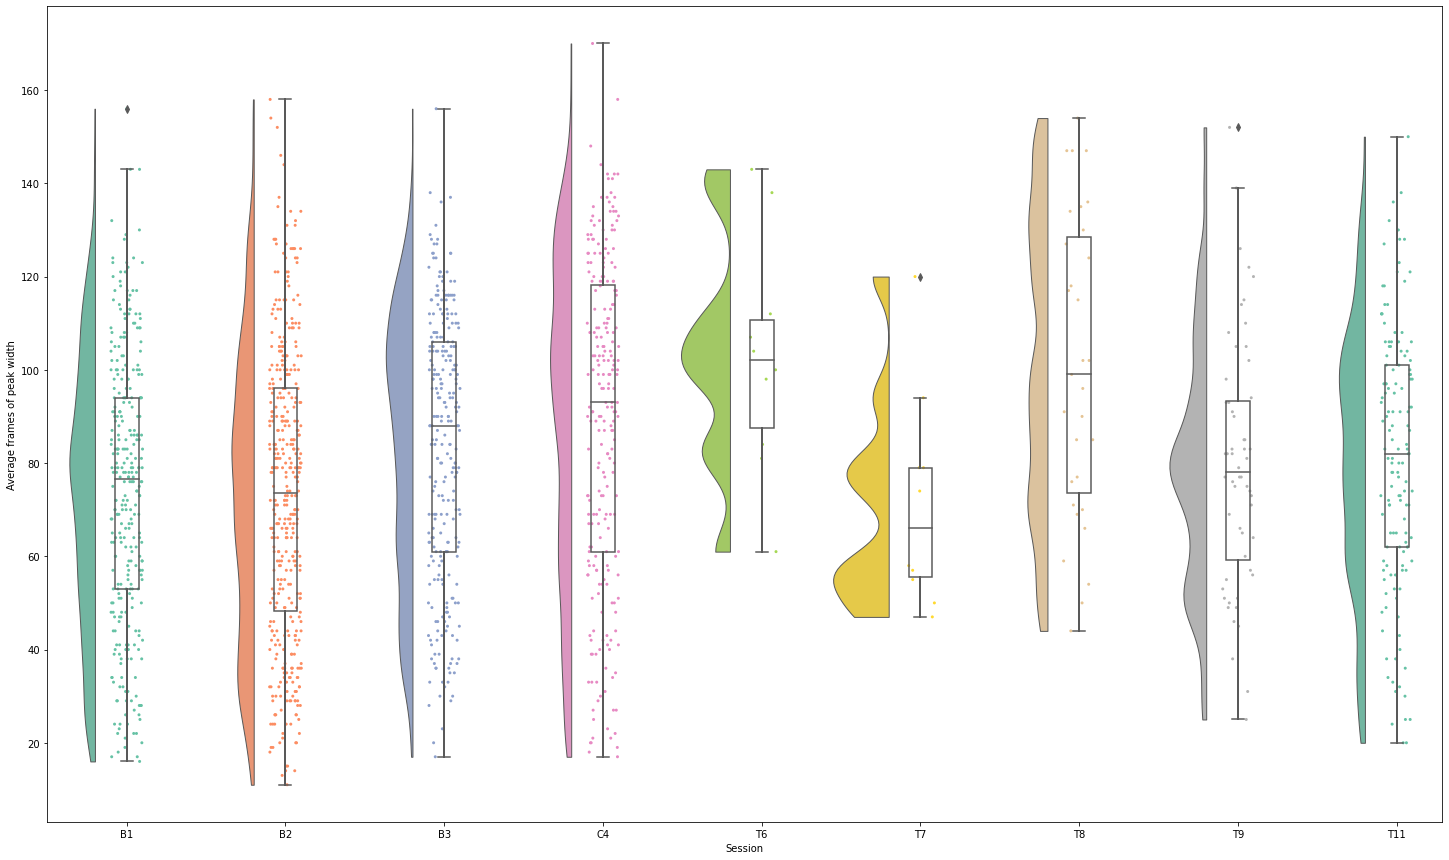

In [83]:
# Usage with a list/np.array input
dx = np.concatenate(session_list)
dy = np.concatenate(peaks_list)
f, ax = plt.subplots(figsize=(25, 15))
ax=pt.RainCloud(dx, dy)

plt.ylabel('Average frames of peak width')
plt.xlabel('Session')
x_label_list = ['B1','B2','B3','C4','T6','T7','T8','T9','T11']
ax.set_xticklabels(x_label_list)

[Text(0, 0, 'B1'),
 Text(1, 0, 'B2'),
 Text(2, 0, 'B3'),
 Text(3, 0, 'C4'),
 Text(4, 0, 'T6'),
 Text(5, 0, 'T7'),
 Text(6, 0, 'T8'),
 Text(7, 0, 'T9'),
 Text(8, 0, 'T11')]

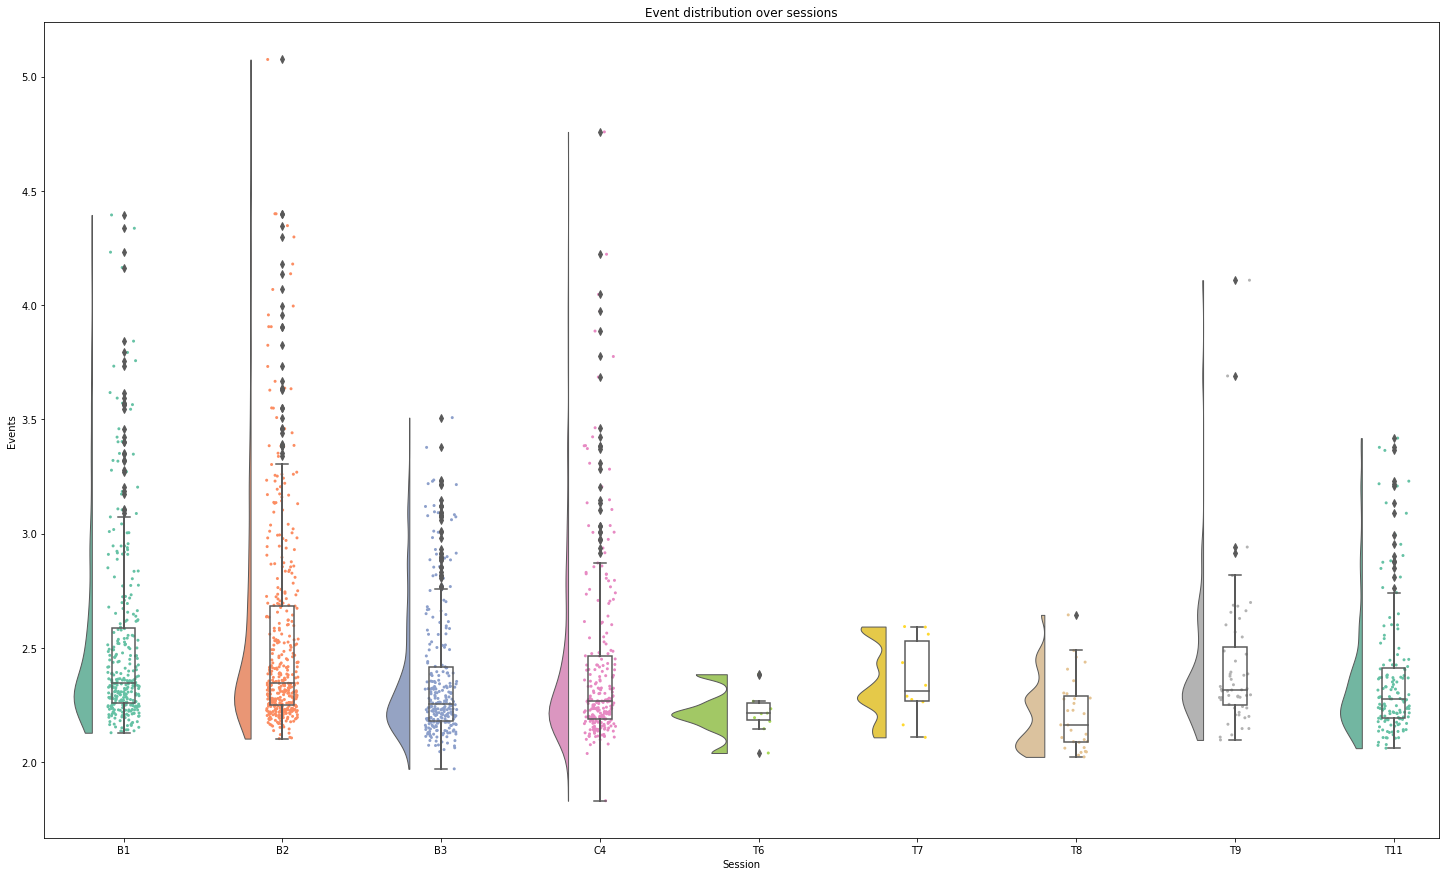

In [84]:
# Usage with a list/np.array input
dx = np.concatenate(session_list)
dy = np.concatenate(ph_list)
f, ax = plt.subplots(figsize=(25, 15))
ax=pt.RainCloud(dx, dy)

plt.ylabel('Events')
plt.xlabel('Session')
plt.title('Event distribution over sessions')
x_label_list = ['B1','B2','B3','C4','T6','T7','T8','T9','T11']
ax.set_xticklabels(x_label_list)

#plt.savefig('Sunshine_skew.png')

[Text(0, 0, 'B1'),
 Text(1, 0, 'B2'),
 Text(2, 0, 'B3'),
 Text(3, 0, 'C4'),
 Text(4, 0, 'T6'),
 Text(5, 0, 'T7'),
 Text(6, 0, 'T8'),
 Text(7, 0, 'T9'),
 Text(8, 0, 'T11')]

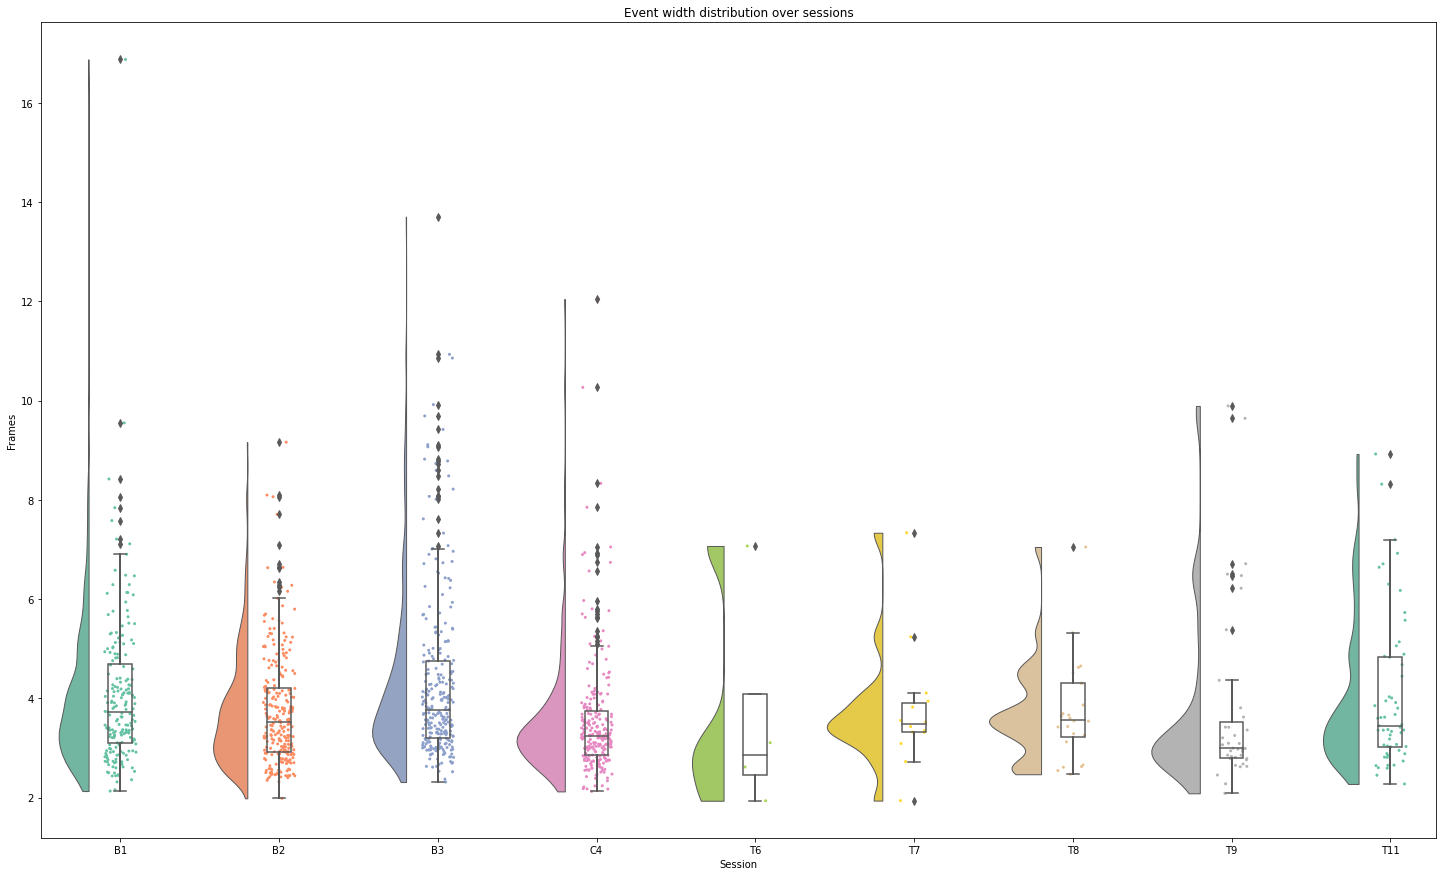

In [80]:
# Usage with a list/np.array input
dx = np.concatenate(session_list)
dy = np.concatenate(widths_list)
f, ax = plt.subplots(figsize=(25, 15))
ax=pt.RainCloud(dx, dy)

plt.ylabel('Frames')
plt.xlabel('Session')
plt.title('Event width distribution over sessions')
x_label_list = ['B1','B2','B3','C4','T6','T7','T8','T9','T11']
ax.set_xticklabels(x_label_list)

#plt.savefig('Sunshine_skew.png')

In [ ]:


#We load in the first mat and arduino files and create the initial eventsdf
nframes_per_folder = ops[()]['nframes_per_folder']
max_frames = 0
max_time = 0
min20 = 1200000  #20 minutes in ms

#Select real cells and normalize raw calcium signal
#Need to convert iscell to array? Probably just being stupid
x = iscell[:,0].astype(int)

#Get dimensions of real cell data
cells,end_frame = np.shape(F[x == 1,:])
F_real = F[x == 1,:]
F_real[F_real == 0] = np.nan

cell_IDs = np.where(x)

F_dff = np.zeros([cells, end_frame])
Frame_count = 0

for session in nframes_per_folder:
    #Need to make this dF/F as well
    F_dff[:,Frame_count:Frame_count + session] = stats.zscore(F_real[:,Frame_count:Frame_count + session],1)
    #F_dff = stats.median_abs_deviation(F_dff[1,:])
    Frame_count = Frame_count + session



In [ ]:
    
time = np.linspace(0,6, num=93)
for cell in range(len(F_dff)):
    fig, ax =  plt.subplots(figsize=(6,4))
    im = ax.plot(time, avg_trials[cell,:,0], label='Day 1A')
    ax.plot(time, avg_trials[cell,:,1], label='Day 1P')
    ax.plot(time, avg_trials[cell,:,2], label='Day 2A')
    ax.plot(time, avg_trials[cell,:,3], label='Day 2P')
    ax.plot(time, avg_trials[cell,:,4], label='Day 3A')
    ax.plot(time, avg_trials[cell,:,5], label='Day 3P')
    ax.plot(time, avg_trials[cell,:,6], label='Day 4A')
    ax.plot(time, avg_trials[cell,:,7], label='Day 4P')
    ax.plot(time, avg_trials[cell,:,8], label='Day 5A')
    ax.plot(time, avg_trials[cell,:,9], label='Day 5P')
    ax.axvline(3.1, color ='b', lw = 0.5, ls = '--', alpha = 0.5)
    ax.axvline(1.5, color ='r', lw = 0.5, ls = '--', alpha = 0.5) 
    plt.legend(loc="upper right")
    plt.ylim(-2,2)
    plt.ylabel('Z-score')
    plt.xlabel('Time (s)')
    plt.title('Average cell response over days Cell #:{0}'.format(cell_IDs[0][cell]))
    fig.tight_layout()
    sname = 'IMG14_avg_trace-{0}.svg'.format(cell_IDs[0][cell]) 
    #plt.savefig(sname)
    
    plt.show()